In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import random
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv(r"....renewable-share-energy.csv")
print(data.head())

   Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731
3  Africa  NaN  1968                                  7.005293
4  Africa  NaN  1969                                  7.956088


In [2]:
data.columns

Index(['Entity', 'Code', 'Year', 'Renewables (% equivalent primary energy)'], dtype='object')

In [3]:
df = data.drop(columns=['Code'], axis=1)

In [4]:
df.head()

,Entity,Year,Renewables (% equivalent primary energy)
0,Africa,1965,5.747495
1,Africa,1966,6.122062
2,Africa,1967,6.325731
3,Africa,1968,7.005293
4,Africa,1969,7.956088


In [5]:
df.describe()

,Year,Renewables (% equivalent primary energy)
count,5603.000000,5603.000000
mean,1993.800821,10.735585
std,16.283556,12.923945
min,1965.000000,0.000000
25%,1980.000000,1.980135
50%,1994.000000,6.522184
75%,2008.000000,14.099622
max,2021.000000,86.874535


In [6]:
df.isnull().sum()

Entity                                      0
Year                                        0
Renewables (% equivalent primary energy)    0
dtype: int64

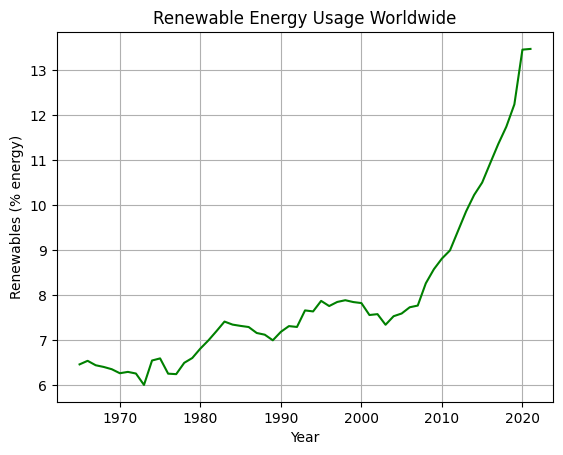

In [7]:
# Measuring the usage of renewables worldwide
world_data = df[df['Entity'] == 'World']
plt.plot(world_data['Year'], world_data['Renewables (% equivalent primary energy)'], color='green')
plt.xlabel('Year')
plt.ylabel("Renewables (% energy)")
plt.title("Renewable Energy Usage Worldwide")
plt.grid(True)
plt.show()

In [8]:
# Finding the countries with the current highest renewable resource usage

latest_year = 2021
latest_year_data = df[df['Year'] == latest_year]

top_usage = latest_year_data.sort_values(by='Renewables (% equivalent primary energy)', ascending=False).head(5)

fig = px.bar(
    top_usage,
    x='Entity',
    y='Renewables (% equivalent primary energy)',
    color='Entity'
 
)

fig.update_layout(
    title = {
        'text': 'Highest Renewable Resource Usage',
        'x': 0.5,
        'xanchor':'center',
        'yanchor':'top'
    },
    xaxis_title = 'Entity',
    yaxis_title = 'Renewable Energy Use(%)',
)

fig.show()

In [9]:
# Finding the Bottom 5 countries for renewable energy usage

latest_year = 2021
latest_year_data = df[df['Year'] == latest_year]

bottom_usage = latest_year_data.sort_values(by='Renewables (% equivalent primary energy)').head(5)

fig = px.bar(
    bottom_usage,
    x='Entity',
    y='Renewables (% equivalent primary energy)',
    color='Entity'    
)

fig.update_layout(
    title = {
        'text': 'Lowest Mean Renewable Resource Usage',
        'x': 0.5,
        'xanchor':'center',
        'yanchor':'top'
    },
    yaxis=dict(range=[0.0, 1]),
    xaxis_title = 'Entity',
    yaxis_title = 'Renewable Energy Use(%)',
)

fig.show()

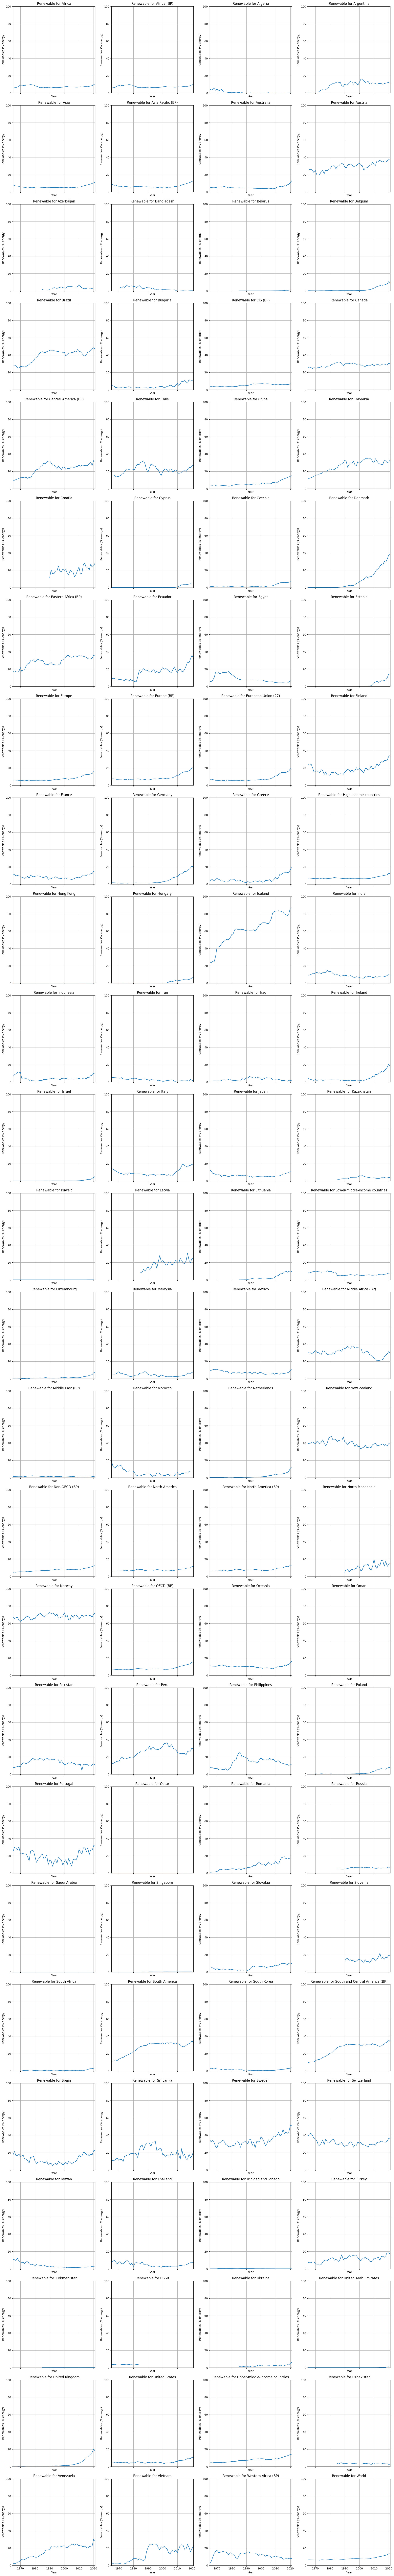

In [10]:
# Time Series of all the nations

entities = df['Entity'].unique()

num_entities = len(entities)
nrows = math.ceil(num_entities / 4)

fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 5*nrows), sharex=True)
axes = axes.flatten()

for i, entity in enumerate(entities):
    entity_data = df[df['Entity'] == entity]

    entity_data = entity_data.sort_values('Year')

    axes[i].plot(entity_data['Year'], entity_data['Renewables (% equivalent primary energy)'], label=entity)
    axes[i].set_title(f'Renewable for {entity}')
    axes[i].set_ylabel('Renewables (% energy)')
    axes[i].set_xlabel('Year')
    axes[i].set_xlim(1965,2021)
    axes[i].set_ylim(0,100)
    axes[i].grid(True)

for j in range(len(entities), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


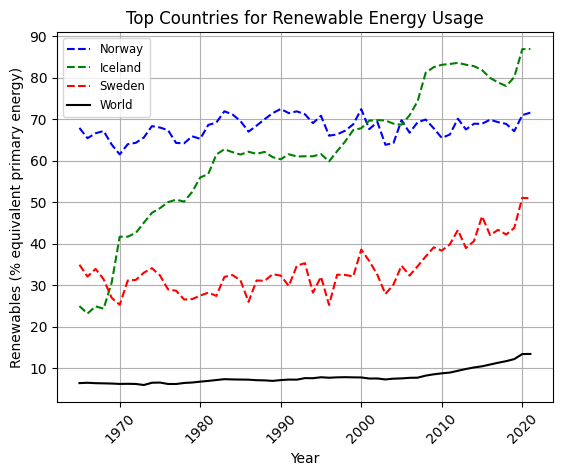

In [ ]:
# Time series of the Top Countries

entity_data = df[df['Entity'] == 'Norway']
plt.plot(entity_data['Year'], entity_data['Renewables (% equivalent primary energy)'], label='Norway', color='blue', linestyle='--')

entitiy_data = df[df['Entity'] == 'Iceland']
plt.plot(entitiy_data['Year'], entitiy_data['Renewables (% equivalent primary energy)'], label='Iceland', color='green', linestyle='--')

entitiy_data = df[df['Entity'] == 'Sweden']
plt.plot(entitiy_data['Year'], entitiy_data['Renewables (% equivalent primary energy)'], label='Sweden', color='red', linestyle='--')

entitiy_data = df[df['Entity'] == 'World']
plt.plot(entitiy_data['Year'], entitiy_data['Renewables (% equivalent primary energy)'], label='World', color='black')


plt.xlabel('Year')
plt.ylabel("Renewables (% equivalent primary energy)")
plt.title("Top Countries for Renewable Energy Usage")

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize='small')

plt.show()

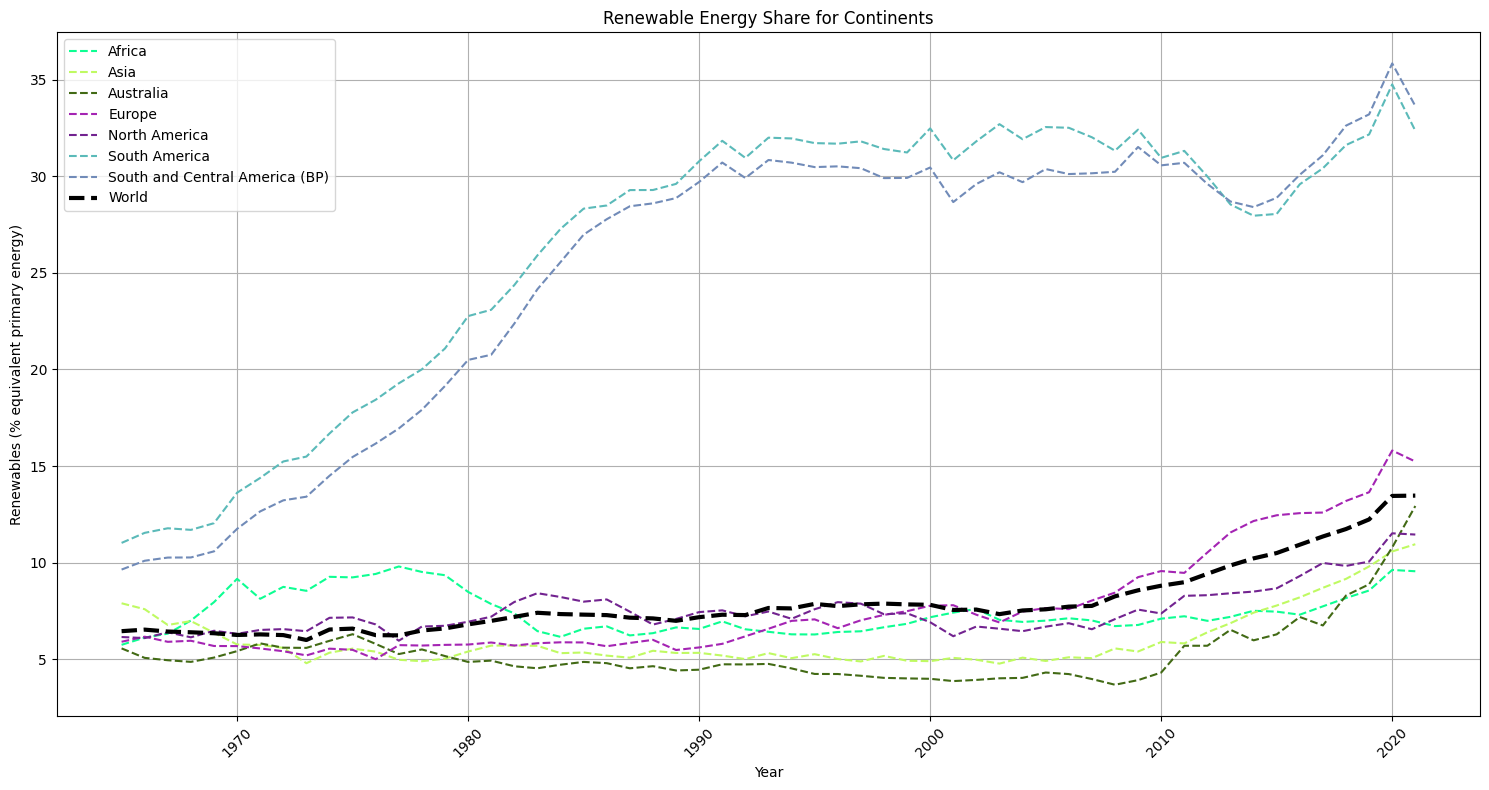

In [ ]:
# Renewable energy by Continent

continent=['Africa', 'Asia', 'Australia','Europe','North America','South America','South and Central America (BP)']

def get_random_color():
    return(random.random(), random.random(), random.random())

plt.figure(figsize=(15,8))

for x in continent:
    entity_data = df[df['Entity']==x]
    plt.plot(entitiy_data['Year'], entity_data['Renewables (% equivalent primary energy)'], label=x, color=get_random_color(), linestyle='--')


world_data = df[df['Entity'] == 'World']
plt.plot(world_data['Year'], world_data['Renewables (% equivalent primary energy)'], label='World', color='black', linestyle='--', linewidth=3)

plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title('Renewable Energy Share for Continents')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')

plt.tight_layout()
plt.show()


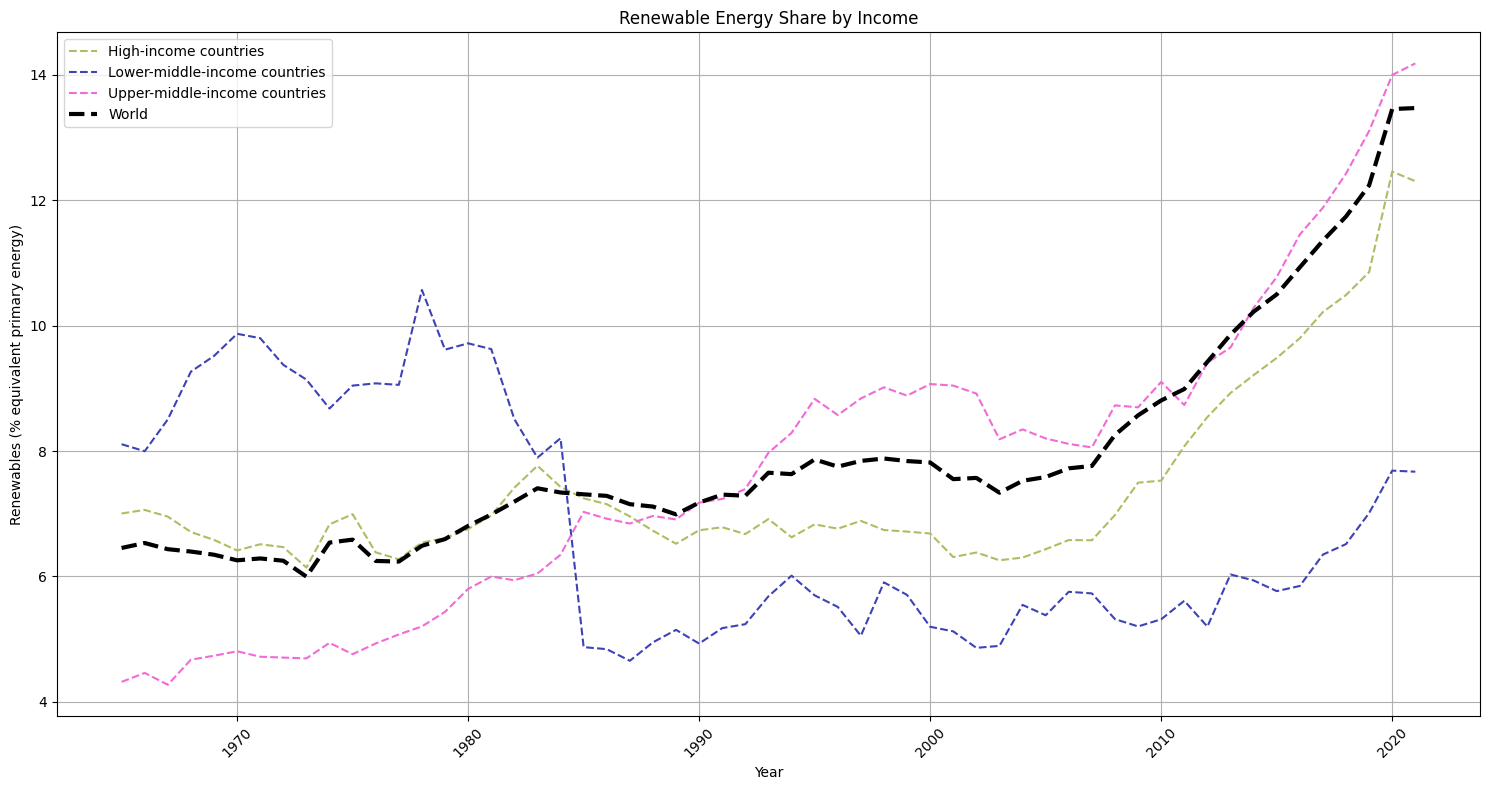

In [ ]:
# Renewable Energy usage based on income

income_countries=['High-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries']

def get_random_color():
    return(random.random(), random.random(), random.random())

plt.figure(figsize=(15,8))

for x in income_countries:
    entity_data = df[df['Entity']==x]
    plt.plot(entity_data['Year'], entity_data['Renewables (% equivalent primary energy)'], label=x, color=get_random_color(), linestyle='--')


world_data = df[df['Entity'] == 'World']
plt.plot(world_data['Year'], world_data['Renewables (% equivalent primary energy)'], label='World', color='black', linestyle='--', linewidth=3)

plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title('Renewable Energy Share by Income')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')

plt.tight_layout()
plt.show()


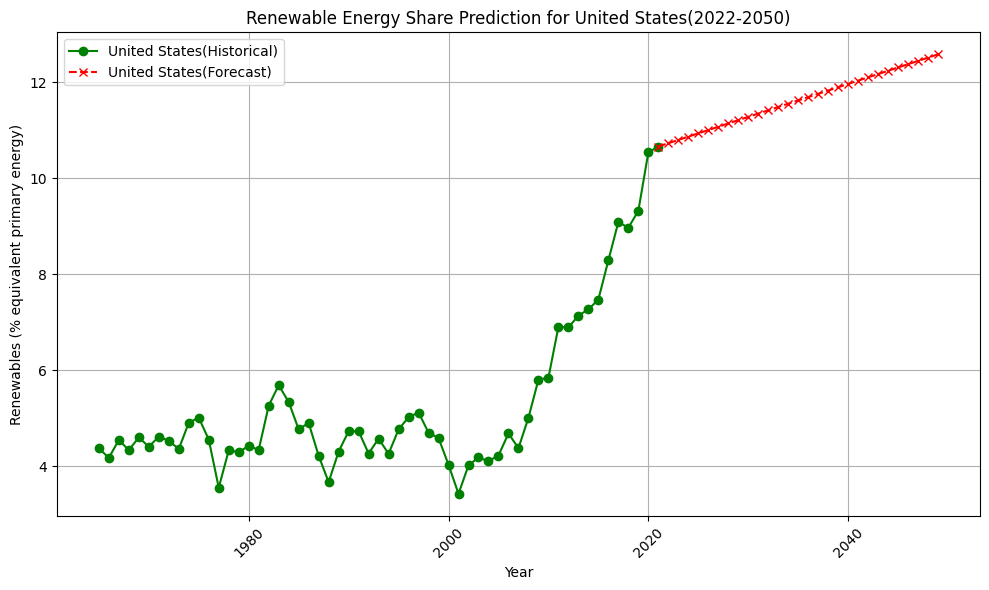

Model Error for United States
Mean Sqaured Error(MSE): 1.5837179611921508
Mean Absoulute Error(MAE): 1.0044102495781186
R-Squared (R²) 0.44582739794742743


In [ ]:
# Predictions of Energy Usage for the United States

us_data = df[df['Entity'] == 'United States']

X = us_data['Year'].values.reshape(-1, 1)
y = us_data['Renewables (% equivalent primary energy)'].values

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

last_year = X[-1][0]
last_value = y[-1]
future_years = np.arange(last_year, 2050). reshape(-1, 1)
future_predictions = model.predict(future_years)

future_predictions = future_predictions - future_predictions[0] + last_value

plt.figure(figsize=(10,6))

plt.plot(us_data['Year'], y, marker='o', color='green', label='United States(Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='United States(Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title('Renewable Energy Share Prediction for United States(2022-2050)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()

plt.show()

print(f'Model Error for United States')
print(f'Mean Sqaured Error(MSE): {mse}')
print(f'Mean Absoulute Error(MAE): {mae}')
print(f'R-Squared (R²) {r2}')


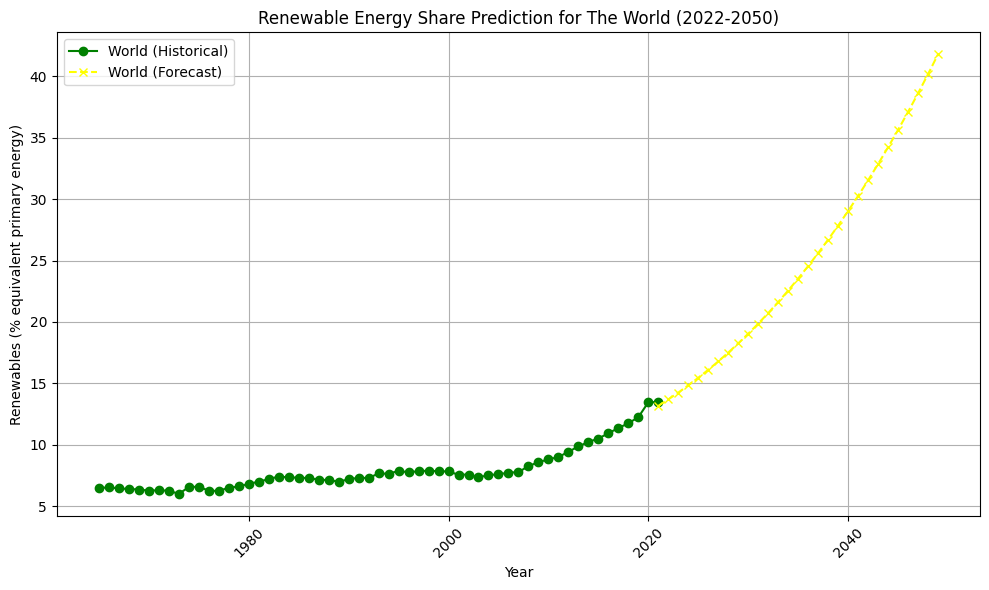

Model Error for The World
Mean Sqaured Error(MSE): 0.14799052204791432
Mean Absoulute Error(MAE): 0.31659616352667935
R-Squared (R²) 0.9533035053212475


In [ ]:
# Predictions of Energy Usage for the World
world_data = df[df['Entity'] == 'World']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Renewables (% equivalent primary energy)'].values

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(x_poly,y)

y_pred = model.predict(x_poly)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

last_year = X[-1][0]
future_years = np.arange(last_year, 2050). reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

plt.figure(figsize=(10,6))

plt.plot(world_data['Year'], y, marker='o', color='green', label='World (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='yellow', label='World (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title('Renewable Energy Share Prediction for The World (2022-2050)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

print(f'Model Error for The World')
print(f'Mean Sqaured Error(MSE): {mse}')
print(f'Mean Absoulute Error(MAE): {mae}')
print(f'R-Squared (R²) {r2}')